# Imports 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import json

from textblob import TextBlob

In [3]:
PATH = '../data/processed/critique_points/aggregated_cp.json'

In [4]:
data = pd.read_json(PATH)
data.head()

,paper_id,paper_title,paper_abstract,paper_acceptance,meta_review,label,review_ids,review_writers,review_contents,review_ratings,review_confidences,review_reply_tos,critique_points,meta_review_critique
0,iclr_2022_jaLDP8Hp_gc,Visual Correspondence Hallucination,Given a pair of partially overlapping source a...,Accept (Poster),This paper receives positive reviews. The auth...,train,"[EkXSobQaGSX, t_m188ir-01, aB-aAw0xvHi, 9MQG_F...","[author, official_reviewer, official_reviewer,...","[ Thank you for your reply, please find our re...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, 8, 5, 8]","[-1, -1, -1, -1, -1, -1, -1, -1, -1, 4, 4, 3]","[9MQG_FP3eQB, Lv3RrS-8N1T, F5nhRjo6xc, dO24FT8...","[{'Methodology': [], 'Experiments': [], 'Clari...","{'Methodology': [], 'Experiments': [], 'Clarit..."
1,iclr_2019_B1xsqj09Fm,Large Scale GAN Training for High Fidelity Nat...,Despite recent progress in generative image mo...,accepted-oral-papers,The paper proposes a set of tricks leading to ...,train,"[SJl68_Hx37, SkgkCbBm0Q, Syxd9-HXAQ, r1gI_-SQA...","[official_reviewer, author, author, author, au...",[This paper present extensions of the Self-Att...,"[9, -1, -1, -1, -1, -1, 7, 8, -1, -1, -1, -1, ...","[4, -1, -1, -1, -1, -1, 3, 4, -1, -1, -1, -1, ...","[iclr_2019_B1xsqj09Fm, SJl68_Hx37, r1gI_-SQAm,...",[{'Methodology': ['Increasing the batch size b...,"{'Methodology': [], 'Experiments': [], 'Clarit..."
2,iclr_2020_BJeXaJHKvB,P-BN: Towards Effective Batch Normalization in...,Neural networks with ReLU activation functions...,reject,This paper addresses the extension of path-spa...,train,"[HygQZEdrir, BygbSE_riH, BJl__VdBiH, rygGgK_ro...","[author, author, author, author, official_revi...",[Thank you for your comments. The following is...,"[-1, -1, -1, -1, 3, 3, 3]","[-1, -1, -1, -1, 4, 4, 1]","[ryeSKamyoB, HkxkpF_j5S, r1leWJ7TYr, iclr_2020...",[{'Methodology': ['The paper does not motivate...,{'Methodology': ['The paper extends path-space...
3,nips_2022_2ge7_pORL_n,BiMLP: Compact Binary Architectures for Vision...,This paper studies the problem of designing co...,Accept,Four reviewers provided feedback on this paper...,train,"[j0xSlomDUSe, KBmpimZpkQD, O4eCZ0ts34E, 7YIm8E...","[official_reviewer, official_reviewer, officia...",[ Thanks for your response. I don't have more ...,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 4, 5,...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 4, 3,...","[lMqMcmUp-1O, PDLVUcRKcB3, Smfma6uKX7F, b1XM6K...","[{'Methodology': [], 'Experiments': [], 'Clari...","{'Methodology': [], 'Experiments': ['The appro..."
4,iclr_2018_SyVVXngRW,Deep Asymmetric Multi-task Feature Learning,We propose Deep Asymmetric Multitask Feature L...,rejected-papers,The paper proposes a multitask deep learning m...,train,"[ryAf2-ugz, H11NN0KgG, S1T4ik9ef]","[official_reviewer, official_reviewer, officia...",[This paper presents a deep asymmetric multi-t...,"[6, 3, 5]","[4, 4, 4]","[iclr_2018_SyVVXngRW, iclr_2018_SyVVXngRW, icl...","[{'Methodology': [], 'Experiments': ['In real-...","{'Methodology': [], 'Experiments': ['limited e..."


# Data Overview

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   paper_id              200 non-null    object
 1   paper_title           200 non-null    object
 2   paper_abstract        200 non-null    object
 3   paper_acceptance      200 non-null    object
 4   meta_review           200 non-null    object
 5   label                 200 non-null    object
 6   review_ids            200 non-null    object
 7   review_writers        200 non-null    object
 8   review_contents       200 non-null    object
 9   review_ratings        200 non-null    object
 10  review_confidences    200 non-null    object
 11  review_reply_tos      200 non-null    object
 12  critique_points       200 non-null    object
 13  meta_review_critique  198 non-null    object
dtypes: object(14)
memory usage: 22.0+ KB


In [6]:
data.isna().sum()

paper_id                0
paper_title             0
paper_abstract          0
paper_acceptance        0
meta_review             0
label                   0
review_ids              0
review_writers          0
review_contents         0
review_ratings          0
review_confidences      0
review_reply_tos        0
critique_points         0
meta_review_critique    2
dtype: int64

In [7]:
data[data['meta_review_critique'].isna()]

,paper_id,paper_title,paper_abstract,paper_acceptance,meta_review,label,review_ids,review_writers,review_contents,review_ratings,review_confidences,review_reply_tos,critique_points,meta_review_critique
31,iclr_2020_r1eBeyHFDH,A Theory of Usable Information under Computati...,We propose a new framework for reasoning about...,accept-talk,All reviewers unanimously accept the paper.,train,"[S1lklsZcor, Sket3aNBoB, Bkx9phEroS, ryl1OrQ0K...","[official_reviewer, author, author, official_r...",[Thank you for addressing all issues raised in...,"[-1, -1, -1, 8, 8]","[-1, -1, -1, 3, 4]","[Bkx9phEroS, r1eqrvhf5S, ryl1OrQ0KS, iclr_2020...","[{'Methodology': [], 'Experiments': [], 'Clari...",NaN
72,iclr_2020_r1ecqn4YwB,N-BEATS: Neural basis expansion analysis for i...,We focus on solving the univariate times serie...,accept-poster,The paper received positive recommendation fro...,train,"[HkxhvW1H5S, SJghIrYk9r, B1xVpwzUiB, Hke5Ahiwj...","[official_reviewer, official_reviewer, author,...",[The paper proposes a DL architecture that ach...,"[6, 8, -1, -1, -1, -1, -1, -1, -1, -1, 6]","[3, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1]","[iclr_2020_r1ecqn4YwB, iclr_2020_r1ecqn4YwB, S...",[{'Methodology': ['The paper proposes a DL arc...,NaN


# Visualizations

# Review Ratings 

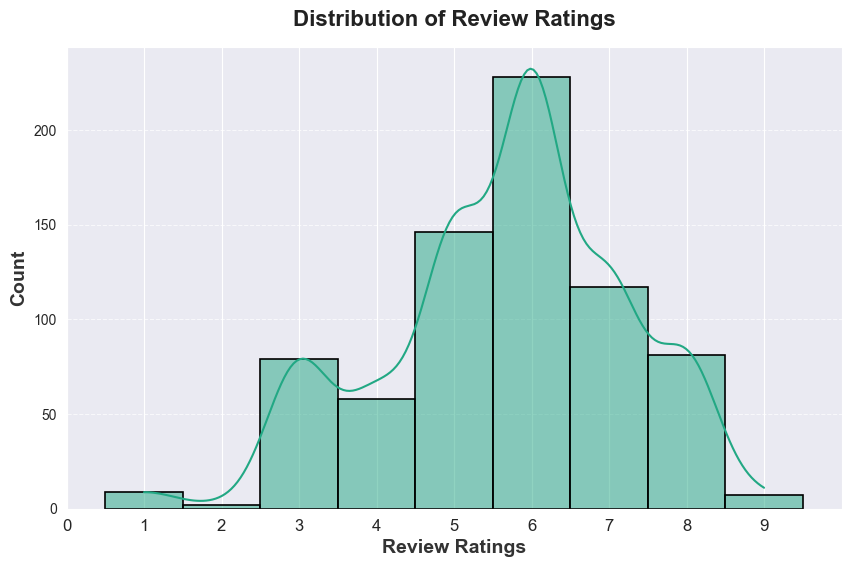

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

all_ratings = [rating for sublist in data['review_ratings'] for rating in sublist if rating != -1]

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

colors = sns.color_palette("viridis", as_cmap=True)

sns.histplot(
    all_ratings, 
    bins=np.arange(min(all_ratings)-0.5, max(all_ratings)+1.5, 1), 
    kde=True, 
    color=colors(0.6), 
    edgecolor="black", 
    linewidth=1.2
)

plt.xlabel("Review Ratings", fontsize=14, fontweight="bold", color="#333333")
plt.ylabel("Count", fontsize=14, fontweight="bold", color="#333333")
plt.title("Distribution of Review Ratings", fontsize=16, fontweight="bold", color="#222222", pad=15)

plt.xticks(range(0, max(all_ratings) + 1), fontsize=12)
plt.xlim(0, 10)

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

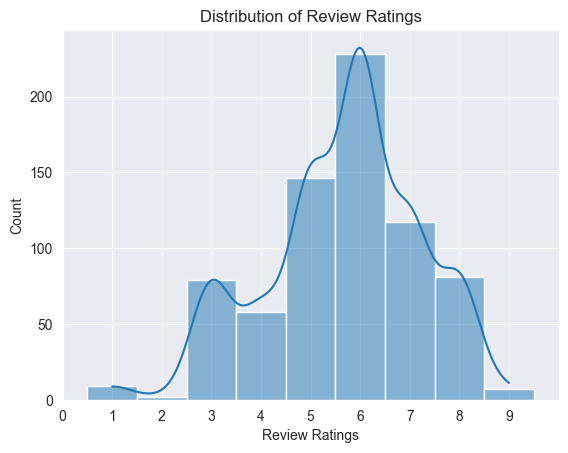

In [9]:
# all_ratings = [rating for sublist in data['review_ratings'] for rating in sublist]
all_ratings = [rating for sublist in data['review_ratings'] for rating in sublist if rating != -1]
sns.histplot(all_ratings, bins=np.arange(min(all_ratings)-0.5, max(all_ratings)+1.5, 1), kde=True)

plt.xlabel("Review Ratings")
plt.ylabel("Count")
plt.title("Distribution of Review Ratings")
plt.xticks(range(0, max(all_ratings) + 1))
plt.xlim(0, 10) 
plt.show()

In [10]:
# Review Ratings normal distribution meaning reviewers consider papers to be of moderate quality.
# There's -1 score (not shown in plots) meaning reviewers did not give any review.

# Paper acceptance status

C:\Users\Arya  Gokhale\AppData\Local\Temp\ipykernel_6568\303324535.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data["acceptance_category"], palette=palette, edgecolor="black")


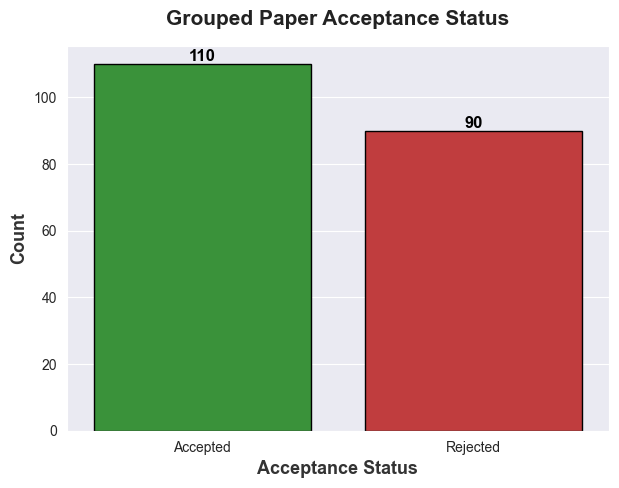

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define mapping for acceptance categories
def categorize_acceptance(label):
    accepted_keywords = ["accept", "accepted", "spotlight", "oral", "poster"]
    return "Accepted" if any(word in label.lower() for word in accepted_keywords) else "Rejected"

# Apply the mapping to categorize the data
data["acceptance_category"] = data["paper_acceptance"].apply(categorize_acceptance)

# Set style
sns.set_style("darkgrid")
plt.figure(figsize=(7, 5))

# Define custom colors
palette = {"Accepted": "#2ca02c", "Rejected": "#d62728"}  # Green for Accepted, Red for Rejected

# Create countplot
ax = sns.countplot(x=data["acceptance_category"], palette=palette, edgecolor="black")

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Labels & title styling
plt.xlabel("Acceptance Status", fontsize=13, fontweight="bold", color="#333333")
plt.ylabel("Count", fontsize=13, fontweight="bold", color="#333333")
plt.title("Grouped Paper Acceptance Status", fontsize=15, fontweight="bold", color="#222222", pad=15)

# Show the figure
plt.show()

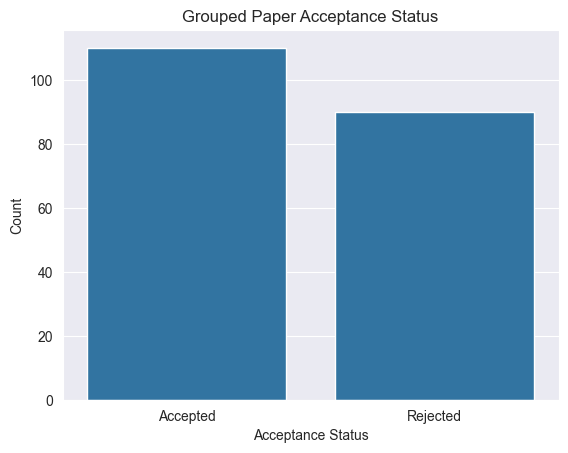

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define mapping for acceptance categories
def categorize_acceptance(label):
    accepted_keywords = ["accept", "accepted", "spotlight", "oral", "poster"]
    return "Accepted" if any(word in label.lower() for word in accepted_keywords) else "Rejected"

# Apply the mapping to categorize the data
data["acceptance_category"] = data["paper_acceptance"].apply(categorize_acceptance)

# Plot the grouped countplot
sns.countplot(x=data["acceptance_category"])
plt.xlabel("Acceptance Status")
plt.ylabel("Count")
plt.title("Grouped Paper Acceptance Status")
plt.show()

In [13]:
# Papers getting accepted and rejected is approximately same.

In [14]:
critiques_data = data[['paper_id', 'critique_points', 'meta_review_critique']]
critiques_data.head()

,paper_id,critique_points,meta_review_critique
0,iclr_2022_jaLDP8Hp_gc,"[{'Methodology': [], 'Experiments': [], 'Clari...","{'Methodology': [], 'Experiments': [], 'Clarit..."
1,iclr_2019_B1xsqj09Fm,[{'Methodology': ['Increasing the batch size b...,"{'Methodology': [], 'Experiments': [], 'Clarit..."
2,iclr_2020_BJeXaJHKvB,[{'Methodology': ['The paper does not motivate...,{'Methodology': ['The paper extends path-space...
3,nips_2022_2ge7_pORL_n,"[{'Methodology': [], 'Experiments': [], 'Clari...","{'Methodology': [], 'Experiments': ['The appro..."
4,iclr_2018_SyVVXngRW,"[{'Methodology': [], 'Experiments': ['In real-...","{'Methodology': [], 'Experiments': ['limited e..."


# Word Count and Sentence Count

In [15]:
data['word_count'] = data['critique_points'].apply(lambda x: len(str(x).split()))
data['sentence_count'] = data['critique_points'].apply(lambda x: len(str(x).split('.')))

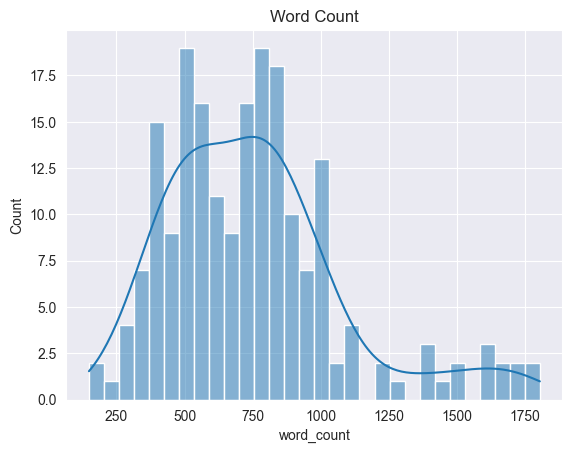

In [16]:
sns.histplot(data['word_count'], bins=30, kde=True)
plt.title('Word Count')
plt.show()

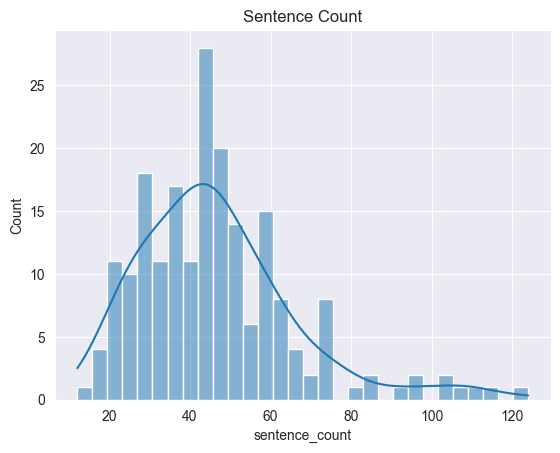

In [17]:
sns.histplot(data['sentence_count'], bins=30, kde=True)
plt.title('Sentence Count')
plt.show()

In [18]:
data['sentiment_polarity'] = data['critique_points'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
data['sentiment_subjectivity'] = data['critique_points'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Polarity

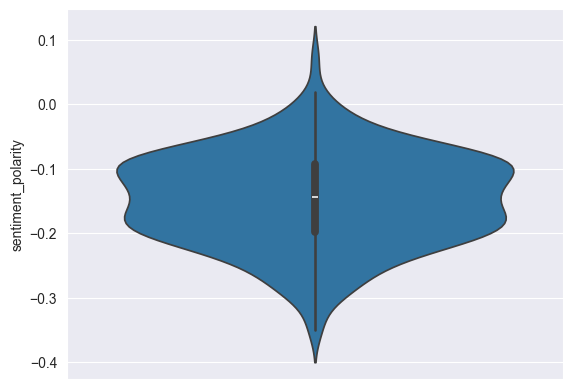

In [19]:
sns.violinplot(y=data['sentiment_polarity'])
plt.show()

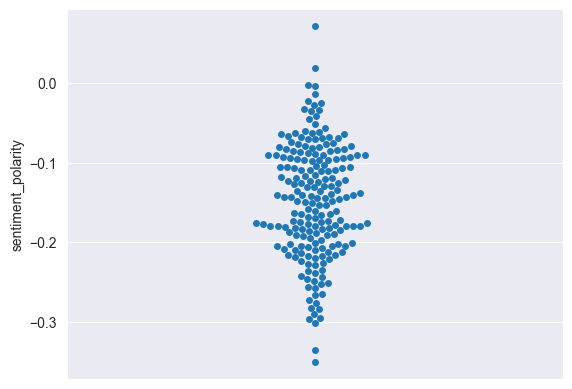

In [20]:
sns.swarmplot(y=data['sentiment_polarity'])
plt.show()

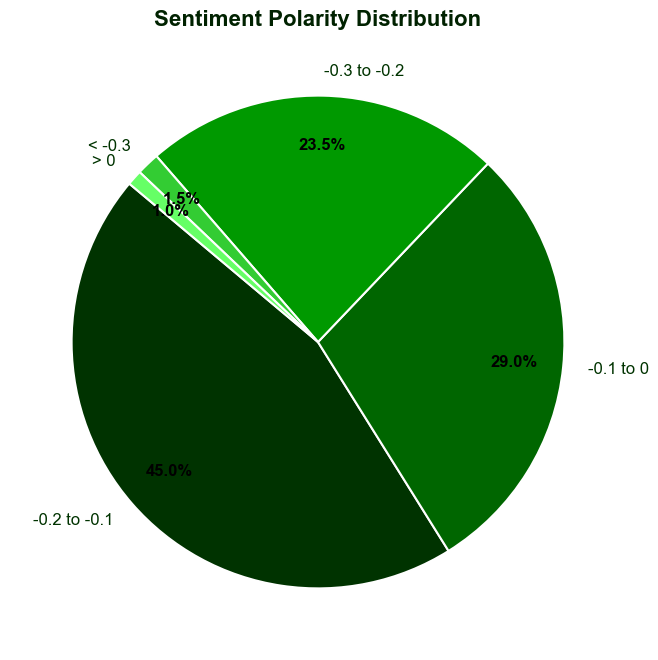

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame containing 'sentiment_polarity'
bins = [-float('inf'), -0.3, -0.2, -0.1, 0, float('inf')]
labels = ['< -0.3', '-0.3 to -0.2', '-0.2 to -0.1', '-0.1 to 0', '> 0']

# Categorize sentiment polarity into bins
data['sentiment_category'] = pd.cut(data['sentiment_polarity'], bins=bins, labels=labels)

# Count occurrences of each category
category_counts = data['sentiment_category'].value_counts()

# Define a deep green aesthetic color palette
colors = ['#003300', '#006600', '#009900', '#33cc33', '#66ff66']  # Dark to bright green gradient

# Plot pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    pctdistance=0.8,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},  # Crisp white edges for contrast
    textprops={'fontsize': 12, 'color': 'black'}
)

# Customize text appearance
for text in texts:
    text.set_color('#003300')  # Deep green labels
for autotext in autotexts:
    autotext.set_color('black')  # White percentage labels for contrast
    autotext.set_fontweight('bold')

plt.title('Sentiment Polarity Distribution', fontsize=16, fontweight='bold', color='#002200')
plt.show()

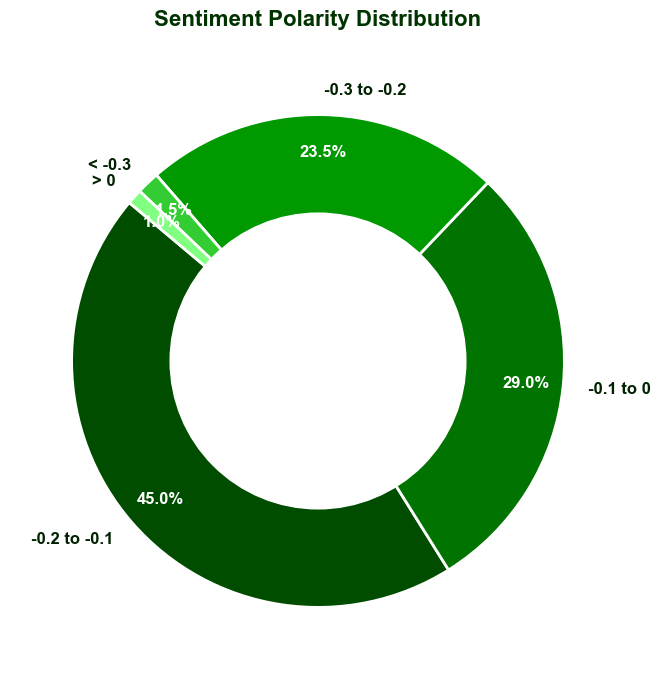

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame containing 'sentiment_polarity'
bins = [-float('inf'), -0.3, -0.2, -0.1, 0, float('inf')]
labels = ['< -0.3', '-0.3 to -0.2', '-0.2 to -0.1', '-0.1 to 0', '> 0']

# Categorize sentiment polarity into bins
data['sentiment_category'] = pd.cut(data['sentiment_polarity'], bins=bins, labels=labels)

# Count occurrences of each category
category_counts = data['sentiment_category'].value_counts()

# Define an elegant green gradient color palette
colors = ['#004d00', '#007300', '#009900', '#33cc33', '#80ff80']  # Darkest to lightest

# Plot pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    pctdistance=0.85,  # Moves % labels inside
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},  # Clean white edges
    textprops={'fontsize': 12, 'color': 'black'}
)

# Improve text formatting
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
    text.set_color('#002200')  # Dark green for category labels

for autotext in autotexts:
    autotext.set_color('white')  # White text for percentages
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

# Title formatting
plt.title('Sentiment Polarity Distribution', fontsize=16, fontweight='bold', color='#003300', pad=20)

# Draw a center circle to make it a donut chart (optional, for aesthetics)
centre_circle = plt.Circle((0,0), 0.60, fc='white')
plt.gca().add_patch(centre_circle)

plt.show()

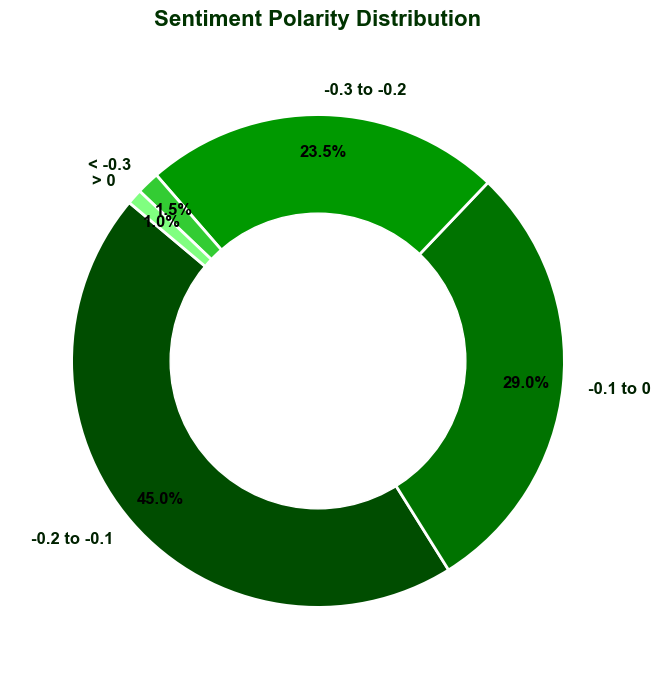

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame containing 'sentiment_polarity'
bins = [-float('inf'), -0.3, -0.2, -0.1, 0, float('inf')]
labels = ['< -0.3', '-0.3 to -0.2', '-0.2 to -0.1', '-0.1 to 0', '> 0']

# Categorize sentiment polarity into bins
data['sentiment_category'] = pd.cut(data['sentiment_polarity'], bins=bins, labels=labels)

# Count occurrences of each category
category_counts = data['sentiment_category'].value_counts()

# Define an elegant green gradient color palette
colors = ['#004d00', '#007300', '#009900', '#33cc33', '#80ff80']  # Darkest to lightest

# Plot pie chart
plt.figure(figsize=(8, 8))
explode = [0.05 if count < 5 else 0 for count in category_counts]  # Move small slices outward

wedges, texts, autotexts = plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    pctdistance=0.85,  # Moves % labels closer inside
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},  
    textprops={'fontsize': 12, 'color': 'black'}
)


# Improve text formatting
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
    text.set_color('#002200')  # Dark green for category labels

for autotext in autotexts:
    autotext.set_color('black')  # White text for percentages
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

# Title formatting
plt.title('Sentiment Polarity Distribution', fontsize=16, fontweight='bold', color='#003300', pad=20)

# Draw a center circle to make it a donut chart (optional, for aesthetics)
centre_circle = plt.Circle((0,0), 0.60, fc='white')
plt.gca().add_patch(centre_circle)

plt.show()

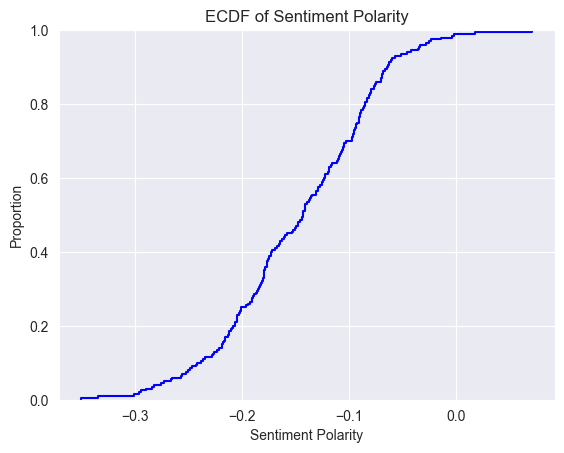

In [24]:
sns.ecdfplot(data['sentiment_polarity'], color="blue")
plt.title("ECDF of Sentiment Polarity")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Proportion")
plt.show()

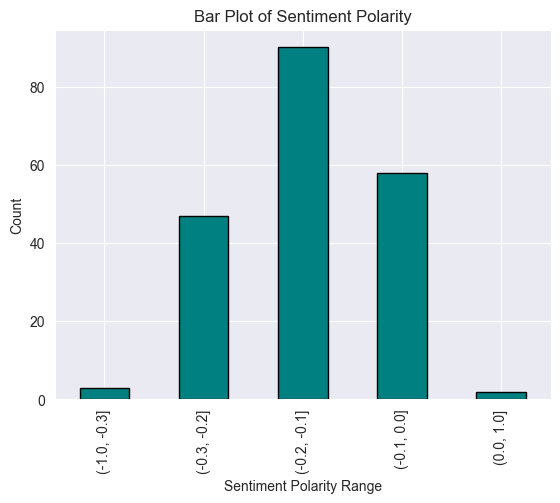

In [25]:
sentiment_bins = pd.cut(data['sentiment_polarity'], bins=[-1, -0.3, -0.2, -0.1, 0, 1])
sentiment_counts = sentiment_bins.value_counts().sort_index()

sentiment_counts.plot(kind="bar", color="teal", edgecolor="black")
plt.xlabel("Sentiment Polarity Range")
plt.ylabel("Count")
plt.title("Bar Plot of Sentiment Polarity")
plt.show()

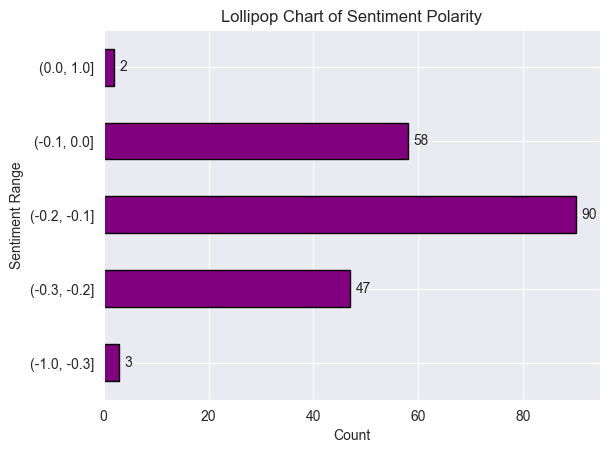

In [26]:
sentiment_counts.plot(kind='barh', color='purple', edgecolor="black")
for index, value in enumerate(sentiment_counts):
    plt.text(value + 1, index, str(value), va='center')
plt.xlabel("Count")
plt.ylabel("Sentiment Range")
plt.title("Lollipop Chart of Sentiment Polarity")
plt.show()

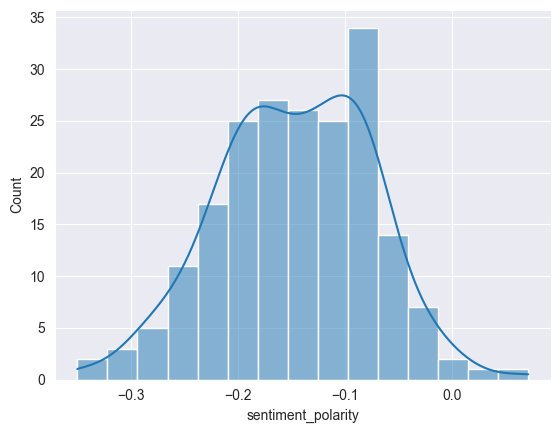

In [27]:
sns.histplot(data['sentiment_polarity'], bins=15, kde=True)
plt.show()

In [28]:
# Almost every review has negative sentiment which is common in peer review because the main aim is improvement suggestions or rejections.

# Subjectivity

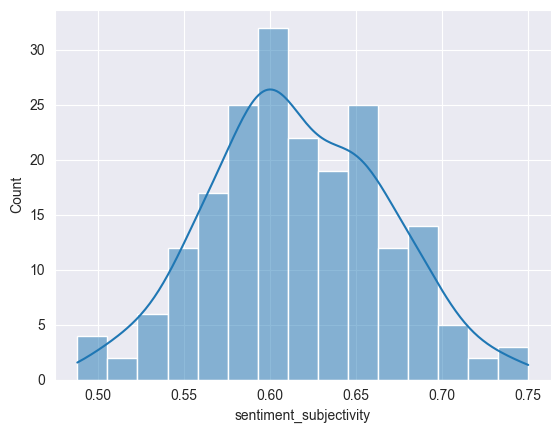

In [29]:
sns.histplot(data['sentiment_subjectivity'], bins=15, kde=True)
plt.show()

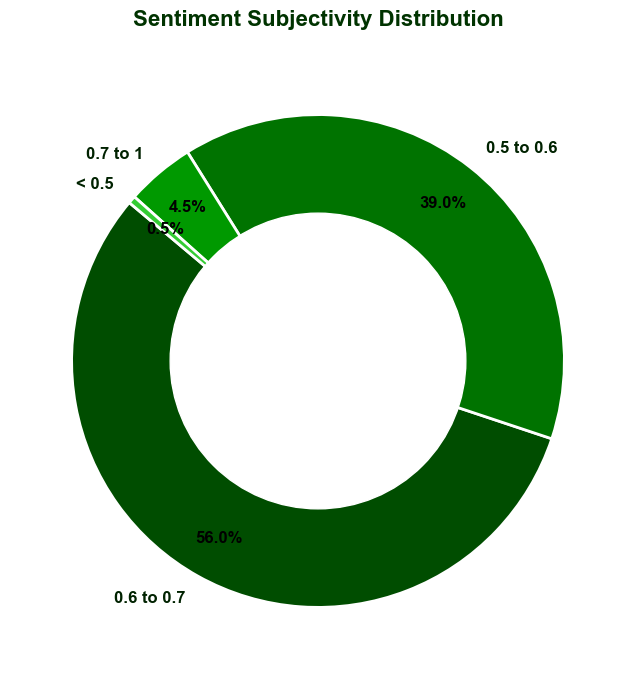

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame containing 'sentiment_polarity'
bins = [-float('inf'), 0.5, 0.6, 0.7, float('inf')]
labels = ['< 0.5', '0.5 to 0.6', '0.6 to 0.7', '0.7 to 1']

# Categorize sentiment polarity into bins
data['subjectivity_category'] = pd.cut(data['sentiment_subjectivity'], bins=bins, labels=labels)

# Count occurrences of each category
category_counts = data['subjectivity_category'].value_counts()

# Define an elegant green gradient color palette
colors = ['#004d00', '#007300', '#009900', '#33cc33', '#80ff80']  # Darkest to lightest

# Plot pie chart
plt.figure(figsize=(8, 8))
explode = [0.05 if count < 5 else 0 for count in category_counts]  # Move small slices outward

wedges, texts, autotexts = plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    pctdistance=0.82,  # Moves % labels closer inside
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},  
    textprops={'fontsize': 12, 'color': 'black'}
)


# Improve text formatting
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
    text.set_color('#002200')  # Dark green for category labels

for autotext in autotexts:
    autotext.set_color('black')  # White text for percentages
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

# Title formatting
plt.title('Sentiment Subjectivity Distribution', fontsize=16, fontweight='bold', color='#003300', pad=20)

# Draw a center circle to make it a donut chart (optional, for aesthetics)
centre_circle = plt.Circle((0,0), 0.60, fc='white')
plt.gca().add_patch(centre_circle)

plt.show()

In [31]:
# The fact scores are above 0.5 suggesting that reviewers express opinions rather than just stating facts.

# Review Rating distribution by paper acceptance

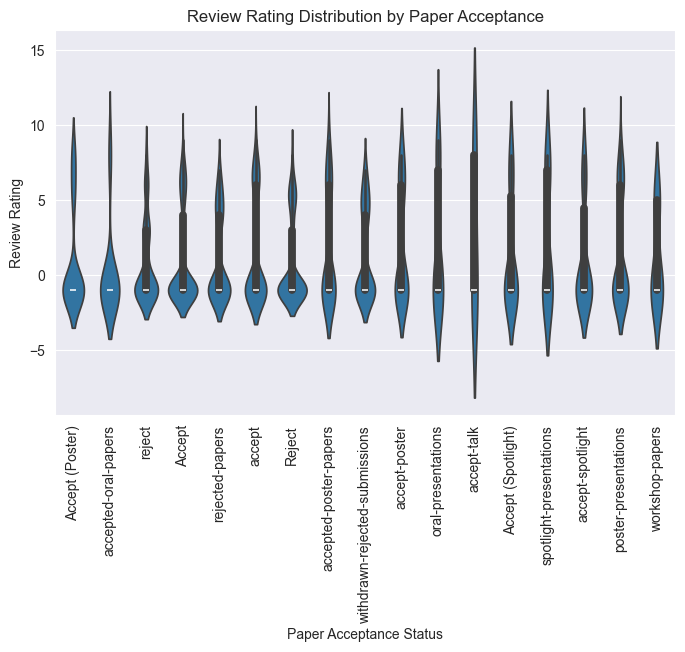

In [32]:
ratings_exploded = data.explode('review_ratings')

plt.figure(figsize=(8, 5))
sns.violinplot(x=ratings_exploded['paper_acceptance'], y=ratings_exploded['review_ratings'])

plt.xlabel("Paper Acceptance Status")
plt.xticks(rotation=90)
plt.ylabel("Review Rating")
plt.title("Review Rating Distribution by Paper Acceptance")
plt.show()

In [33]:
# If review rating is high, the paper is most likely accepted for talk followed by oral presentation.

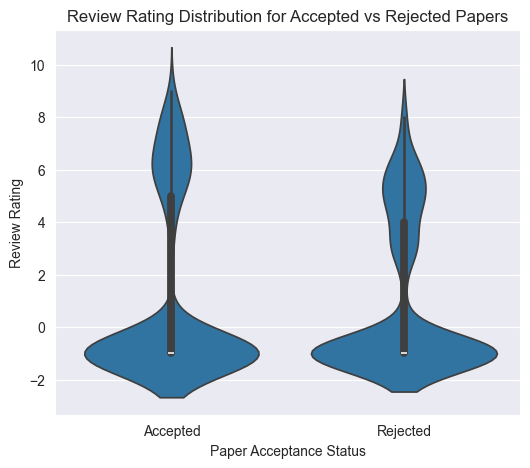

In [34]:
acceptance_mapping = {
    'Accept': 'Accepted',
    'Accept (Poster)': 'Accepted',
    'accepted-oral-papers': 'Accepted',
    'oral-presentations': 'Accepted',
    'accept-talk': 'Accepted',
    'Accept (Spotlight)': 'Accepted',
    'spotlight-presentations': 'Accepted',
    'accept-spotlight': 'Accepted',
    'poster-presentations': 'Accepted',
    'accept-poster': 'Accepted',
    'accepted-poster-papers': 'Accepted',
    
    'Reject': 'Rejected',
    'reject': 'Rejected',
    'rejected-papers': 'Rejected',
    'withdrawn-rejected-submissions': 'Rejected',
}

ratings_exploded['paper_acceptance'] = ratings_exploded['paper_acceptance'].map(acceptance_mapping)
ratings_exploded = ratings_exploded.dropna(subset=['paper_acceptance'])

plt.figure(figsize=(6, 5))
sns.violinplot(x=ratings_exploded['paper_acceptance'], y=ratings_exploded['review_ratings'])

plt.xlabel("Paper Acceptance Status")
plt.ylabel("Review Rating")
plt.title("Review Rating Distribution for Accepted vs Rejected Papers")
plt.show()

# Analysis

### 1. Distribution of Review Ratings
Most of the reviews lie in 5-7 range meaning the quality of the papers is moderate-high as per the reviewers. There is a significant portion of -1 which tells us that NO REVIEW RATING has been provided to those papers.

### 2. Paper acceptance status
Nearly balanced data of ACCEPTANCE and REJECTION.

### 3. Sentiment Polarity section (many plots but used pie)
Almost every review has negative sentiment which is common in peer review because the main aim is improvement suggestions or rejections.

### 4. Sentiment Subjectivity section (many plots but used pie)
The fact scores are above 0.5 suggesting that reviewers express opinions rather than just stating facts.

### 5. Paper acceptance review rating distribution (ViolinPlot)
If review rating is high, the paper is most likely accepted for talk followed by oral presentation.